<a href="https://colab.research.google.com/github/kedarkotwal1/FraudJobDetection/blob/main/FakeJobPrediction_V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import pandas as pd
import nltk
import numpy as np
import re
import io
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.width',None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive

[Errno 2] No such file or directory: 'drive/MyDrive'
/content/drive/MyDrive


In [ ]:
mydf = pd.read_csv('fake_job.csv')

In [ ]:
print(mydf.head())

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

In [ ]:
print(mydf.info())
print(mydf.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

# Creating a copy of mydf and storing it into jobdf

In [ ]:
jobdf = mydf.copy()

In [ ]:
print(jobdf.head(2))

   job_id                                      title          location  \
0       1                           Marketing Intern  US, NY, New York   
1       2  Customer Service - Cloud Video Production    NZ, , Auckland   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...    

#Percent of null values present in each feature

In [ ]:
total = jobdf.isnull().sum().sort_values(ascending=False)
percent_1 = jobdf.isnull().sum()/jobdf.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total','%'])
missing_data

,Total,%
salary_range,15012,84.0
department,11547,64.6
required_education,8105,45.3
benefits,7210,40.3
required_experience,7050,39.4
function,6455,36.1
industry,4903,27.4
employment_type,3471,19.4
company_profile,3308,18.5
requirements,2695,15.1


#Total Null values in the dataset

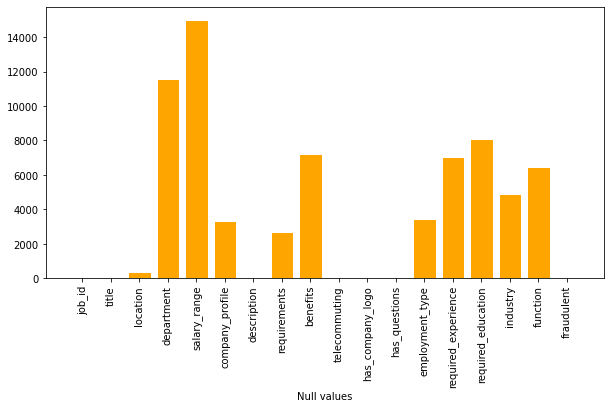

In [ ]:
nullval = jobdf.isnull().sum()
plt.figure(figsize=(10,5))
plt.bar(jobdf.columns,nullval,color = 'orange', edgecolor = 'white')
plt.xlabel('Null values')
plt.xticks(rotation='vertical')
plt.show()

Same chart but horizontal

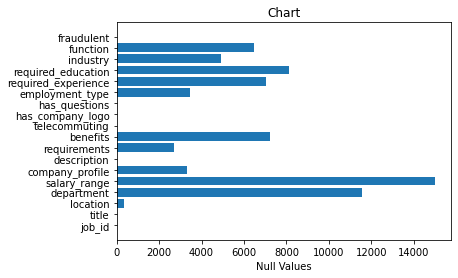

In [ ]:
#plt.rcdefaults()
fig, ax = plt.subplots()
#plt.figure(figsize=(25,10))
ax.barh(jobdf.columns, nullval, align = 'center')
#ax.set_yticks(np.arange(mydf.columns))

#ax.invert_yaxes()
ax.set_xlabel('Null Values')
ax.set_title('Chart')
plt.show()



Distribution of Fraud and Non-fraud job adverts, very unbalanced dataset.

In [ ]:
jobdf['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [ ]:
jobdf[jobdf['job_id']==15064]

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
15063,15064,Beauty & Fragrance consultants needed,"GB, , Belfast",NaN,NaN,Established on the principles that full time e...,Luxury beauty &amp; fragrance consultants need...,NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
jobdf[jobdf['job_id']==15064]

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
15063,15064,Beauty & Fragrance consultants needed,"GB, , Belfast",NaN,NaN,Established on the principles that full time e...,Luxury beauty &amp; fragrance consultants need...,NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


#Finding word length count of company_profile, job description, requirements, benefits.

In [ ]:
print(jobdf['description'].iloc[23])

#URL_eda2500ddcedb60957fcd7f5b164e092966f8c4e8fb89ce70a16bea1545a297d#, an up and coming social media company, is seeking a VP, Sales and Sponsorship executive to be responsible for creating and selling branded, high-impact social media marketing and sponsorship programs for its key product, “The Ultimate Business App."#URL_eda2500ddcedb60957fcd7f5b164e092966f8c4e8fb89ce70a16bea1545a297d# combines the ability to discover, connect and share with fellow professionals and offers the unique ability to communicate, manage, store and notate all aspects of your working life from one website and one mobile app. It’s positioned to be the world's newest social networking platform for professionals and the companies they work for.Do you have what it takes to be part of “The Next Big Thing” to hit social media? Read on…Responsibilities:Create, package and sell marketing and sponsorship opportunities within the Businessfriend suite of connection and communication tools to boost web site traffic and

In [ ]:
#print(mydf['required_education'].unique())
function = lambda x:len(x.split(' '))

len_compprof = jobdf['company_profile'].astype(str).apply(function)
len_desc = jobdf['description'].astype(str).apply(function)
len_req = jobdf['requirements'].astype(str).apply(function)
len_benefits = jobdf['benefits'].astype(str).apply(function)

print(len_compprof.head())
print(len_desc.head())
print(len_req.head())
print(len_benefits.head())

jobdf['compprof_len'] = len_compprof
jobdf['desc_len'] = len_desc
jobdf['req_len'] = len_req
jobdf['benefits_len'] = len_benefits


0    141
1    150
2    136
3     85
4    205
Name: company_profile, dtype: int64
0    124
1    309
2     50
3    345
4    182
Name: description, dtype: int64
0    115
1    187
2    164
3    174
4     89
Name: requirements, dtype: int64
0      1
1    225
2      1
3     96
4      3
Name: benefits, dtype: int64


In [ ]:
print(jobdf.benefits.iloc[0])

nan


Retrieve job advert with desc_len 2074

In [ ]:
print(jobdf[jobdf['desc_len']==2074])

      job_id                               title       location department  \
4778    4779  Drinking Water/Wastewater Operator  US, CA, 96080        NaN   

     salary_range company_profile  \
4778          NaN             NaN   

                                            description requirements benefits  \
4778  Drinking Water/Wastewater Operator (Part-Time)...          NaN      NaN   

      telecommuting  has_company_logo  has_questions employment_type  \
4778              0                 0              0       Part-time   

     required_experience required_education      industry function  \
4778           Associate                NaN  Oil & Energy      NaN   

      fraudulent  compprof_len  desc_len  req_len  benefits_len  
4778           0             1      2074        1             1  


Display description of the job advert with maximum description word count

In [ ]:
print(jobdf.description.loc[jobdf['desc_len']==2074])
print("\n")
print("job advert with maximum word count", jobdf['desc_len'].max())
#jobdf['desc_len'].loc[:,201]

4778    Drinking Water/Wastewater Operator (Part-Time)...
Name: description, dtype: object


job advert with maximum word count 2074


#Utilizing NA values in columns. Create new columns like no_description,no_benefits,no_companyProfile, etc. and put 1 if true.

Replacing benefits NaN values by 'empty'

In [ ]:
jobdf['company_profile'].fillna('Empty',inplace=True)
jobdf['requirements'].fillna('Empty',inplace=True)
jobdf['description'].fillna('Empty',inplace=True)
jobdf['benefits'].fillna('Empty',inplace=True)

In [ ]:
print(jobdf.head())

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

In [ ]:
jobdf.head()

Creating new column empty_benefits, empty_desc, empty_compprof having value as 1 or 0.

In [ ]:
checkNA = lambda x: 1 if x=='empty' else 0

empty_compprof = pd.DataFrame(jobdf['company_profile'].astype(str).apply(checkNA))
empty_desc = pd.DataFrame(jobdf['description'].astype(str).apply(checkNA))
empty_req = pd.DataFrame(jobdf['requirements'].astype(str).apply(checkNA))
empty_benefits = pd.DataFrame(jobdf['benefits'].astype(str).apply(checkNA))


# print(empty_benefits.value_counts())
# print(empty_benefits[:10])

actually creating columns.

In [ ]:
jobdf['empty_compprof'] = empty_compprof
jobdf['empty_desc'] = empty_desc
jobdf['empty_req'] = empty_req
jobdf['empty_benefits'] = empty_benefits



In [ ]:
print(jobdf.head())

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

In [ ]:
print(jobdf.iloc[5498].benefits)

This is an entry level position and we offer full online training. You do NOT need any special skills to get started.Earn as much as you can doing data entry.  Complete Training provided before you start working and it’s easy to start!  ________________________________________Don’t let this opportunity pass you by.POSITIONS ARE STILL AVAILABLE - GET STARTED RIGHT NOWIf you fit the above description and meet the requirements, please apply stating your locationApply at: #EMAIL_3720fb437cf9ea0fba89dddcb596c3afd772be237f383163a3d18e00e4c65595#


Most popular fields and most popular employment type.

#Trial

In [ ]:
plt.figure(figsize=(25,20))
plt.subplot(3,3,1)
plt.plot(jobdf['required_education'].astype(str), color = 'red')
plt.xlabel('REQ EDU')
plt.xticks(rotation='vertical')

plt.subplot(3,3,2)
plt.hist(jobdf['required_experience'].astype(str), color = 'yellow', edgecolor = 'black', )
plt.xlabel('REQ EXP')
plt.xticks(rotation='vertical')

plt.subplot(3,3,3)
plt.hist(jobdf['function'].astype(str), color = 'blue', edgecolor = 'black', )
plt.xlabel('Location')
plt.xticks(rotation='vertical')


plt.show()

In [ ]:
jobdf['location'].isna().sum()

346

#Plotting the length of fraud and non_fraud job adverts.

Description length

<class 'pandas.core.frame.DataFrame'>


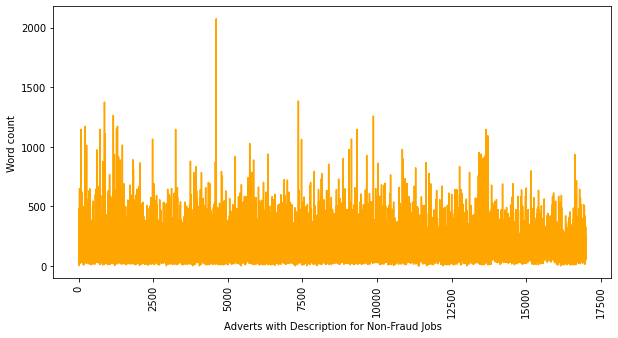

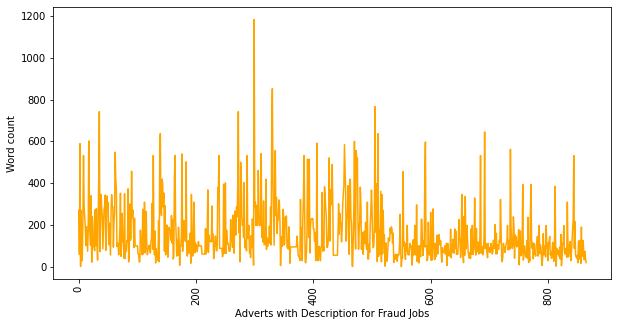

In [ ]:
desc_fraud = pd.DataFrame(jobdf[jobdf['fraudulent']==1].desc_len)
#print(desc_fraud)

desc_nonfraud = pd.DataFrame(jobdf[jobdf['fraudulent']==0].desc_len)
print(type(desc_nonfraud))
desc_fraud.reset_index(drop=True,inplace=True)
desc_nonfraud.reset_index(drop=True,inplace=True)

plt.figure(figsize=(10,5))
plt.plot(desc_nonfraud, color = 'orange')
plt.ylabel('Word count')
plt.xlabel('Adverts with Description for Non-Fraud Jobs')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(desc_fraud, color = 'orange')
plt.ylabel('Word count')
plt.xlabel('Adverts with Description for Fraud Jobs')
plt.xticks(rotation='vertical')
plt.show()


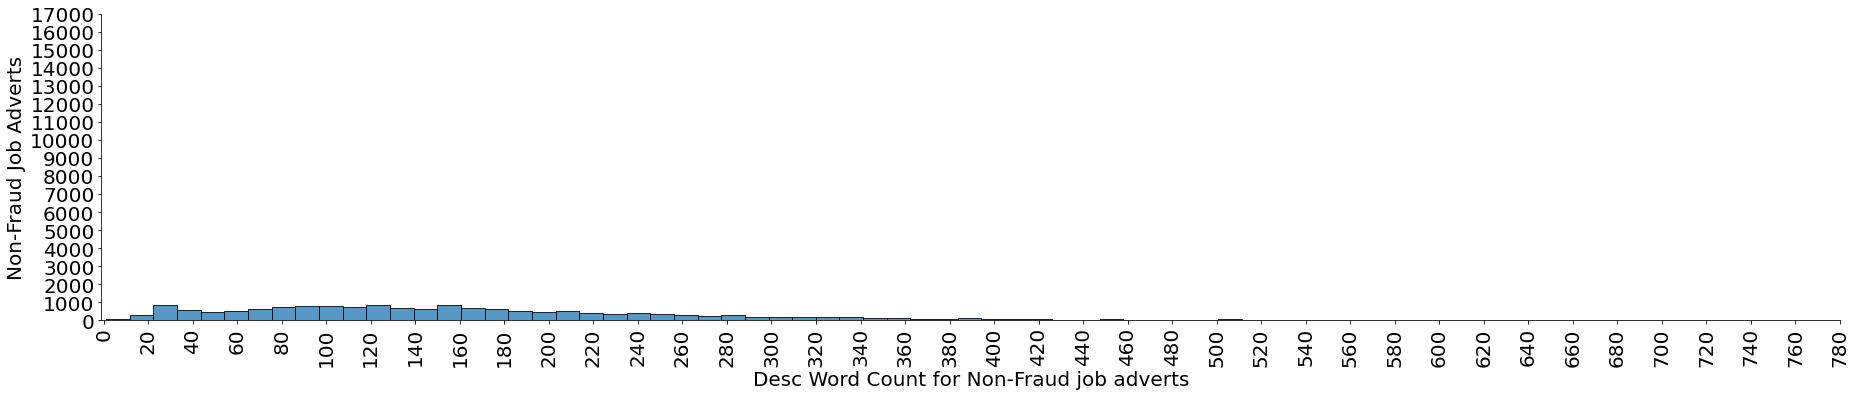

In [ ]:
sns.displot(desc_nonfraud['desc_len'], height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Desc Word Count for Non-Fraud job adverts', fontsize = 20)
plt.ylabel('Non-Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,800, 20), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(desc_nonfraud['desc_len'])), 1000), fontsize = 20)
plt.show()

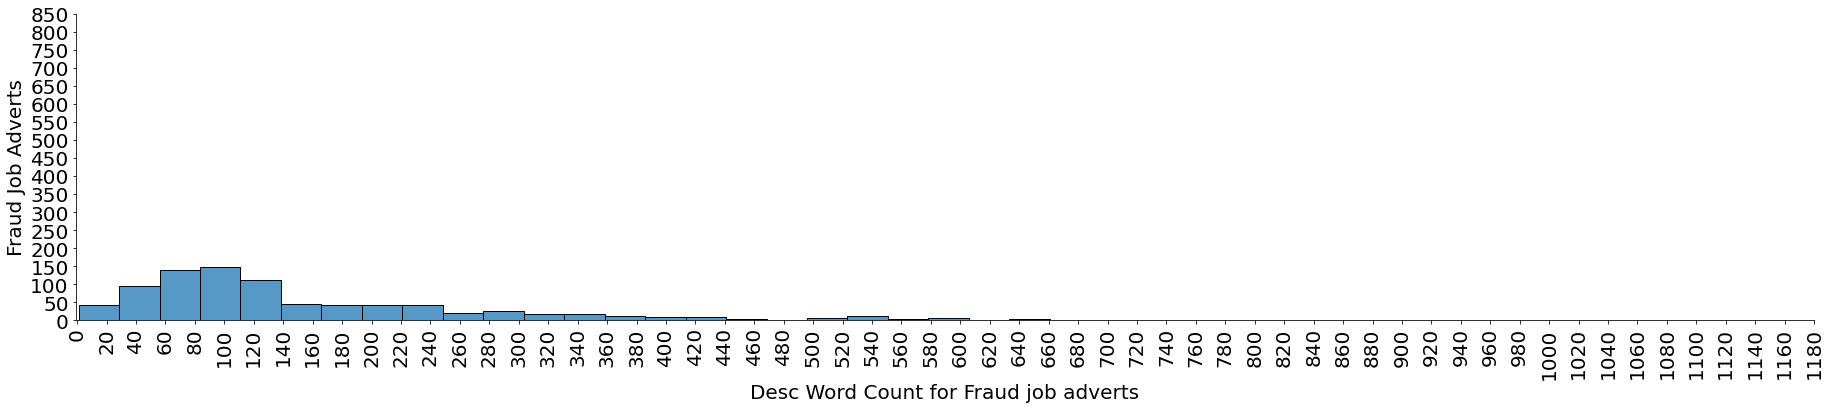

In [ ]:
#plt.figure(figsize=(5,15))
#plt.hist(benefits_fraud_list, linewidth = 2)

sns.displot(desc_fraud['desc_len'], height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Desc Word Count for Fraud job adverts', fontsize = 20)
plt.ylabel('Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,max(list(desc_fraud['desc_len'])), 20), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(desc_fraud['desc_len'])), 50), fontsize = 20)
plt.show()

#THIS IS THRESHOLD FOR SHORT LENGTH

The whole idea behind setting a threshold. 
We want to set the threshold based on the word count for fraud job adverts as ultimately we are going to classify fraud job adverts. 

So, a word count length below which there are large number of fraud jobs and less number of genuine job adverts. 


By viewing distribution of lengths for fraud and non fraud... You should check whether there is a certain threshold of the word count length that covers most of fraud job adverts, if there is, check whether the same threshold has any influence on non fraud adverts. 

For example, for the word count length 5, there are 587 fraud jobs out of 866 that come under it and 2772 genuine jobs out of 17k that come under it. 


Considering 100 as threshold for short description. As there are 393 out of 800 fraud job adverts with less than 100 desc_len (49% fraud jobs) and 5k out of 17k(29% genuine job adverts) with less than 100 desc_len

In [ ]:
len(jobdf[(jobdf['desc_len']<=100) & (jobdf['fraudulent']==0)])

5284

In [ ]:
#has short description
def has_short_description(x):
  if x <= 100:
    return 1
  else:
    return 0

#has_short_desc = lambda x: 1 if x<=100 else 0

short_desc_list = jobdf['desc_len'].apply(has_short_description)

In [ ]:
jobdf['has_short_desc'] = short_desc_list
print(short_desc_list[0:5], "\n", jobdf.desc_len.head(5))



0    0
1    0
2    1
3    0
4    0
Name: desc_len, dtype: int64 
 0    124
1    309
2     50
3    345
4    182
Name: desc_len, dtype: int64


trial

In [ ]:
jobdf[jobdf['desc_len']<=500].desc_len.mean()

158.92169778897926

Benefits length

<class 'pandas.core.frame.DataFrame'>


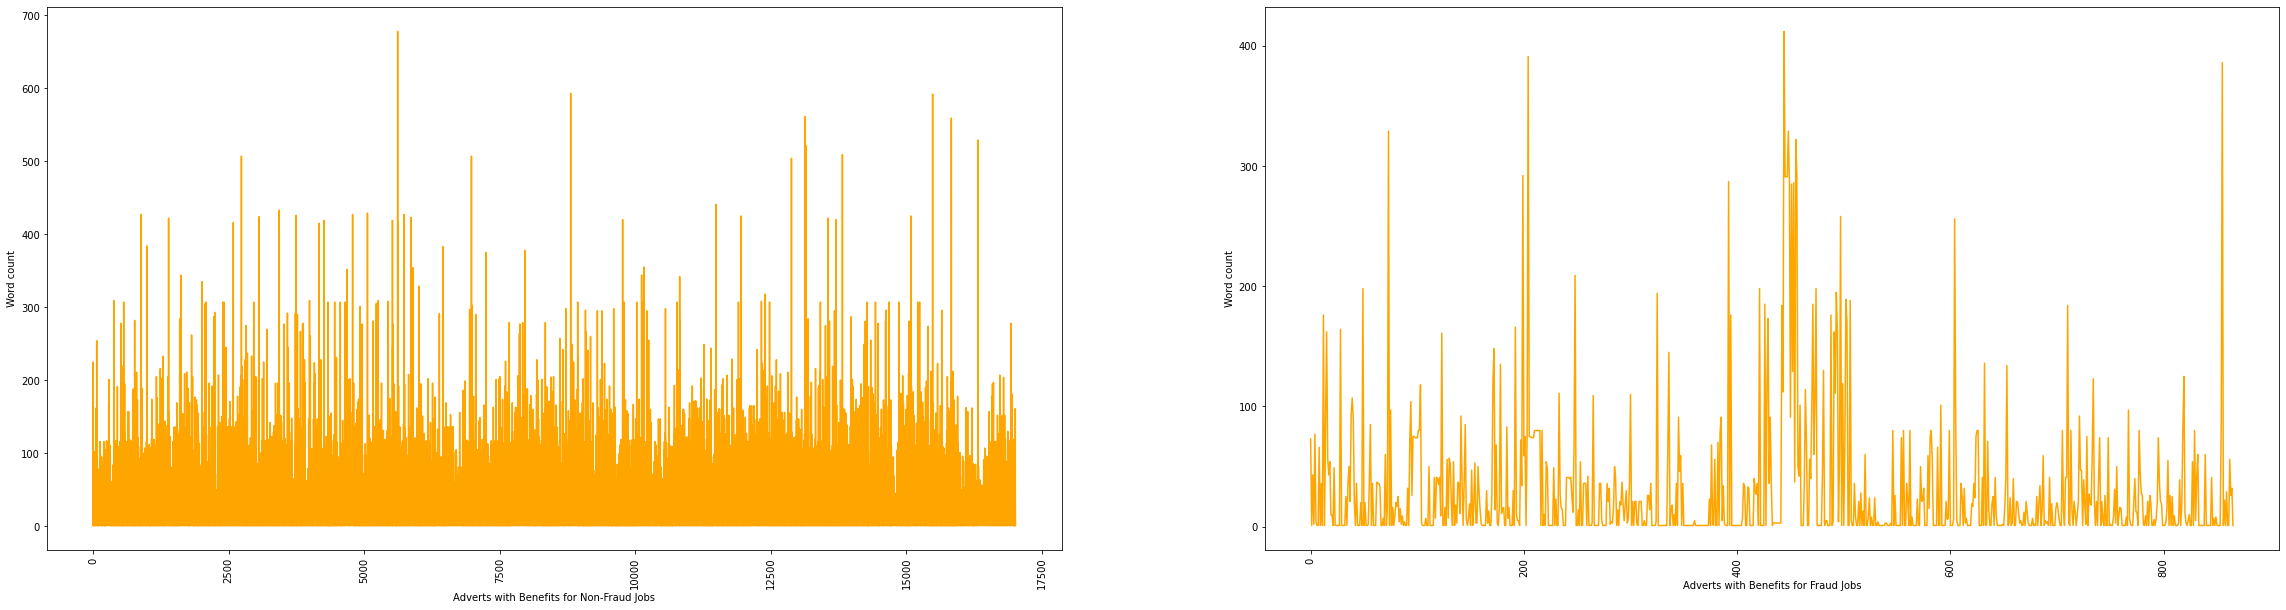

In [ ]:
benefits_fraud = pd.DataFrame(jobdf[jobdf['fraudulent']==1].benefits_len)
#print(desc_fraud)

benefits_nonfraud = pd.DataFrame(jobdf[jobdf['fraudulent']==0].benefits_len)
print(type(benefits_nonfraud))
benefits_fraud.reset_index(drop=True,inplace=True)
benefits_nonfraud.reset_index(drop=True,inplace=True)

plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.plot(benefits_nonfraud, color = 'orange')
plt.ylabel('Word count')
plt.xlabel('Adverts with Benefits for Non-Fraud Jobs')
plt.xticks(rotation='vertical')
#plt.show()

#plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.plot(benefits_fraud, color = 'orange')
plt.ylabel('Word count')
plt.xlabel('Adverts with Benefits for Fraud Jobs')
plt.xticks(rotation='vertical')
plt.show()

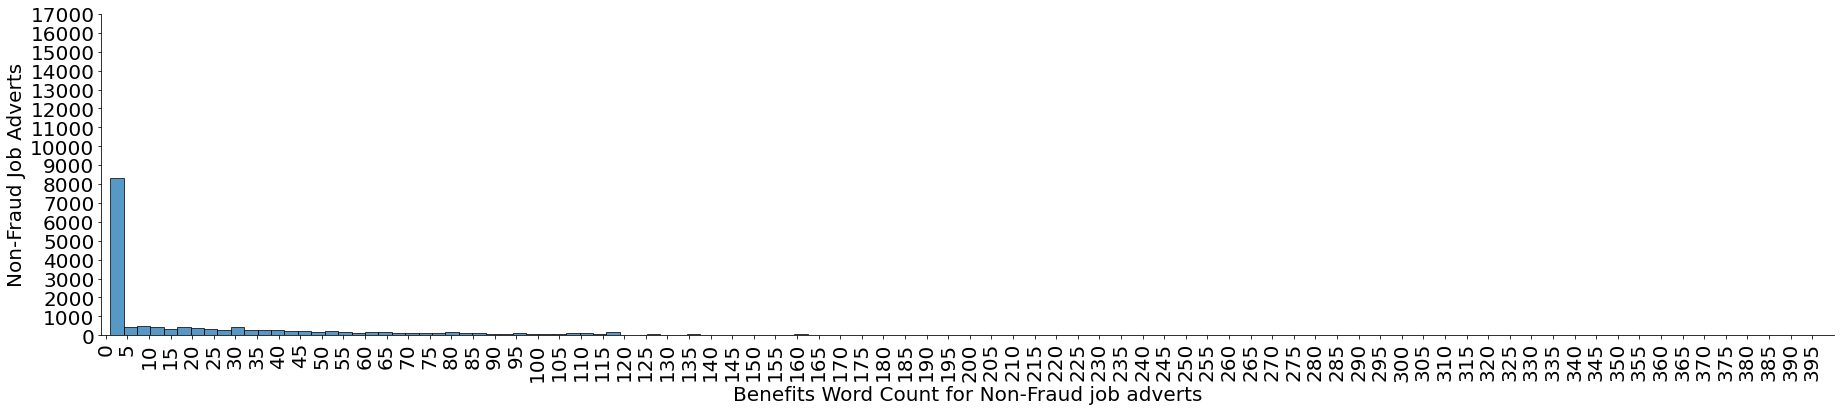

In [ ]:
sns.displot(list(benefits_nonfraud['benefits_len']), height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Benefits Word Count for Non-Fraud job adverts', fontsize = 20)
plt.ylabel('Non-Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,400,5), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(benefits_nonfraud['benefits_len'])),1000), fontsize = 20)
plt.show()

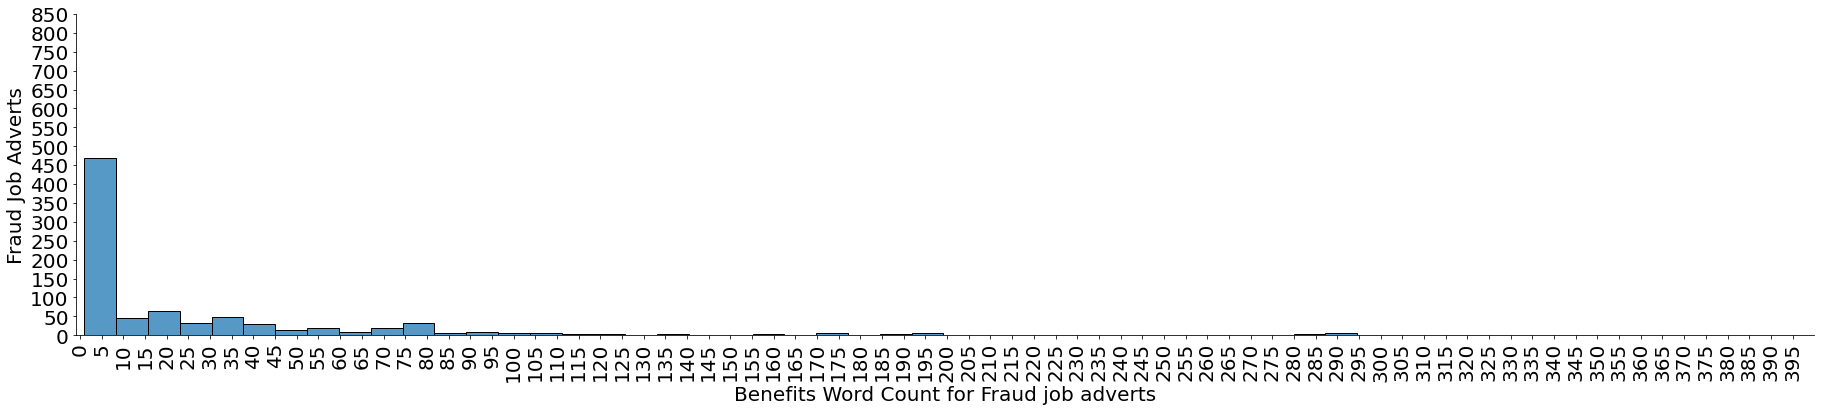

In [ ]:
sns.displot(list(benefits_fraud['benefits_len']), height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Benefits Word Count for Fraud job adverts', fontsize = 20)
plt.ylabel('Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,400,5), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(benefits_fraud['benefits_len'])),50), fontsize = 20)
plt.show()


In [ ]:
type(benefits_fraud)

list

In [ ]:
len(jobdf[(jobdf['benefits_len']<=2) & (jobdf['fraudulent']==0)])

7322

Not sure about how has_short_benefits would prove beneficial for classification.


In [ ]:
#has short description
def has_short_benefits(x):
  if x <= 2:
    return 1
  else:
    return 0

#has_short_desc = lambda x: 1 if x<=100 else 0

short_ben_list = jobdf['benefits_len'].apply(has_short_benefits)

In [ ]:
jobdf['has_short_benefits'] = short_ben_list
print(short_ben_list[0:5], "\n", jobdf.benefits_len.head(5))

0    1
1    0
2    1
3    0
4    0
Name: benefits_len, dtype: int64 
 0      1
1    225
2      1
3     96
4      3
Name: benefits_len, dtype: int64


company profile length

<class 'pandas.core.frame.DataFrame'>


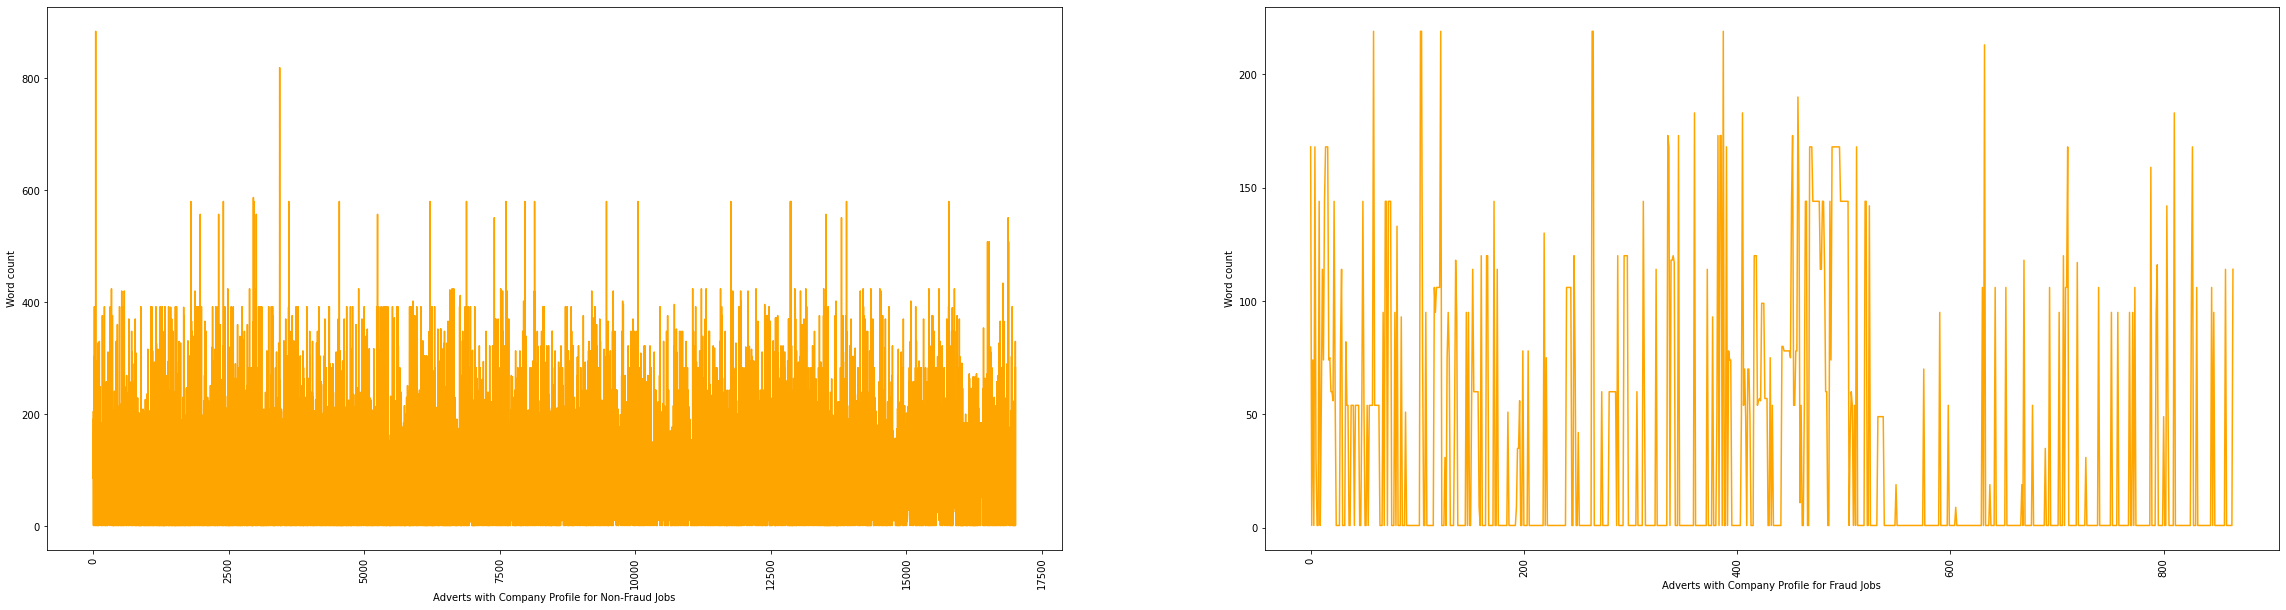

In [ ]:
compprof_fraud = pd.DataFrame(jobdf[jobdf['fraudulent']==1].compprof_len)
#print(desc_fraud)

compprof_nonfraud = pd.DataFrame(jobdf[jobdf['fraudulent']==0].compprof_len)
print(type(compprof_nonfraud))
compprof_fraud.reset_index(drop=True,inplace=True)
compprof_nonfraud.reset_index(drop=True,inplace=True)

plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.plot(compprof_nonfraud, color = 'orange')
plt.ylabel('Word count')
plt.xlabel('Adverts with Company Profile for Non-Fraud Jobs')
plt.xticks(rotation='vertical')
#plt.show()

#plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.plot(compprof_fraud, color = 'orange')
plt.ylabel('Word count')
plt.xlabel('Adverts with Company Profile for Fraud Jobs')
plt.xticks(rotation='vertical')
plt.show()

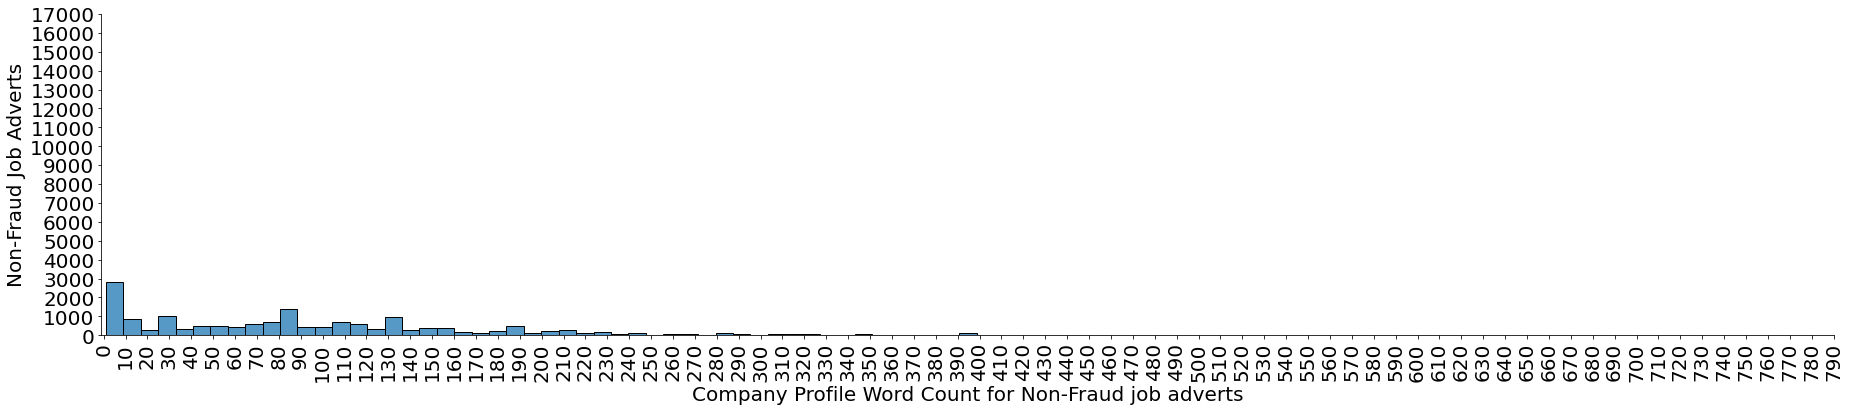

In [ ]:
sns.displot(list(compprof_nonfraud['compprof_len']), height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Company Profile Word Count for Non-Fraud job adverts', fontsize = 20)
plt.ylabel('Non-Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,800,10), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(compprof_nonfraud['compprof_len'])),1000), fontsize = 20)
plt.show()

In [ ]:
jobdf.head()

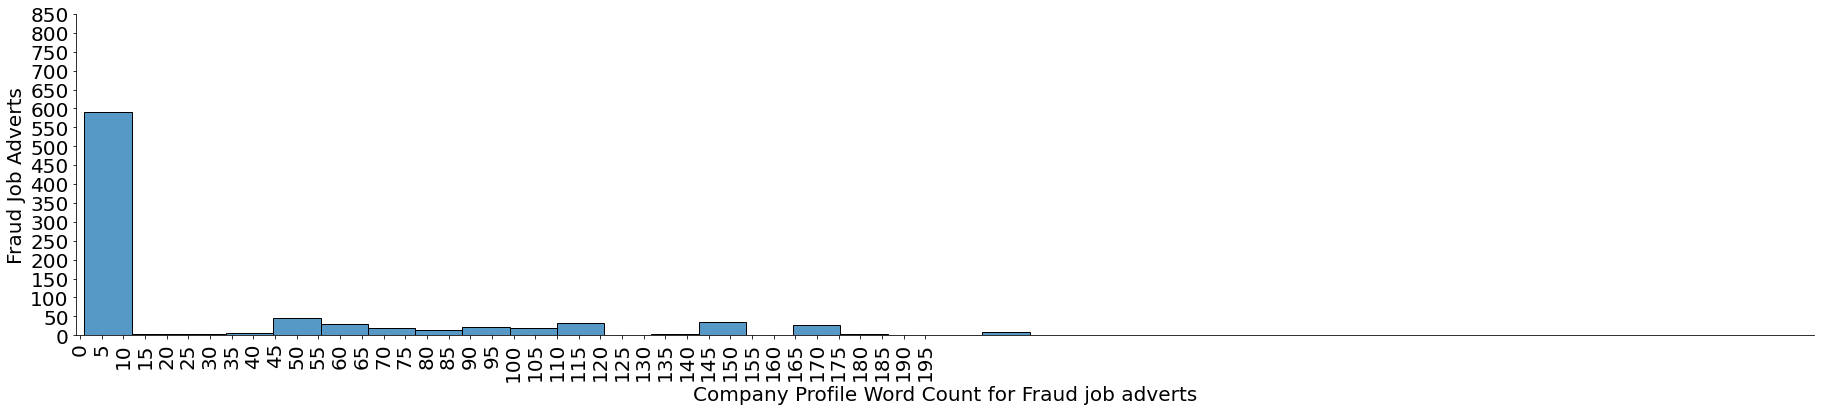

In [ ]:
sns.displot(list(compprof_fraud['compprof_len']), height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Company Profile Word Count for Fraud job adverts', fontsize = 20)
plt.ylabel('Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,200,5), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(compprof_fraud['compprof_len'])),50), fontsize = 20)
plt.show()

Considering 10 as threshold for company profile word count, as fraud jobs have total 587 out of 866 fraud job adverts (68%) and genuine jobs have 3544 adverts out of 17014 (20%) below 10 word count length.

In [ ]:
len(jobdf[(jobdf['compprof_len']<=10) & (jobdf['fraudulent']==0)])

3544

In [ ]:
len(jobdf[jobdf['fraudulent']==0])

17014

In [ ]:
#has short company profile
def has_short_compprof(x):
  if x <= 10:
    return 1
  else:
    return 0

#has_short_desc = lambda x: 1 if x<=100 else 0

short_compprof_list = jobdf['compprof_len'].apply(has_short_compprof)

In [ ]:
jobdf['has_short_compprof'] = short_compprof_list
print(short_compprof_list[0:5], "\n", jobdf.compprof_len.head(5))

0    0
1    0
2    0
3    0
4    0
Name: compprof_len, dtype: int64 
 0    141
1    150
2    136
3     85
4    205
Name: compprof_len, dtype: int64


<class 'pandas.core.frame.DataFrame'>


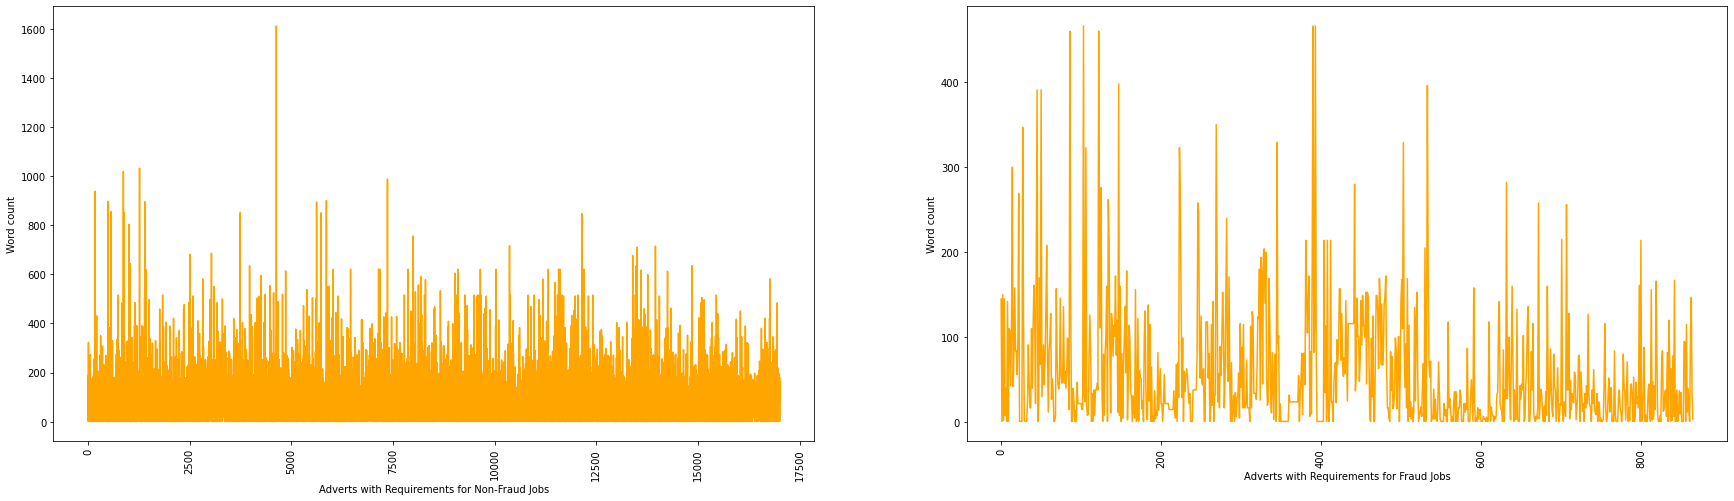

In [ ]:
req_len_fraud = pd.DataFrame(jobdf[jobdf['fraudulent']==1].req_len)
#print(desc_fraud)

req_len_nonfraud = pd.DataFrame(jobdf[jobdf['fraudulent']==0].req_len)
print(type(req_len_fraud))
req_len_fraud.reset_index(drop=True,inplace=True)
req_len_nonfraud.reset_index(drop=True,inplace=True)

plt.figure(figsize=(30,8))
plt.subplot(1,2,1)
plt.plot(req_len_nonfraud, color = 'orange')
plt.ylabel('Word count')
plt.xlabel('Adverts with Requirements for Non-Fraud Jobs')
plt.xticks(rotation='vertical')
#plt.show()

#plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.plot(req_len_fraud, color = 'orange')
plt.ylabel('Word count')
plt.xlabel('Adverts with Requirements for Fraud Jobs')
plt.xticks(rotation='vertical')
plt.show()

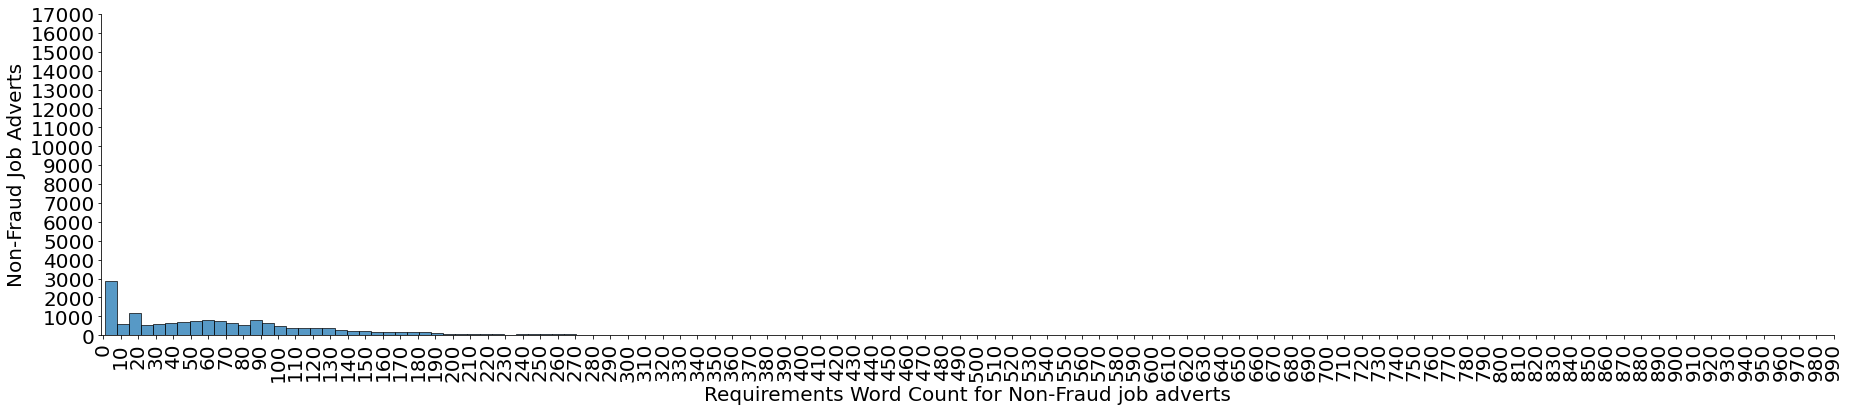

In [ ]:
sns.displot(list(req_len_nonfraud['req_len']), height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Requirements Word Count for Non-Fraud job adverts', fontsize = 20)
plt.ylabel('Non-Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,1000,10), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(req_len_nonfraud['req_len'])),1000), fontsize = 20)
plt.show()

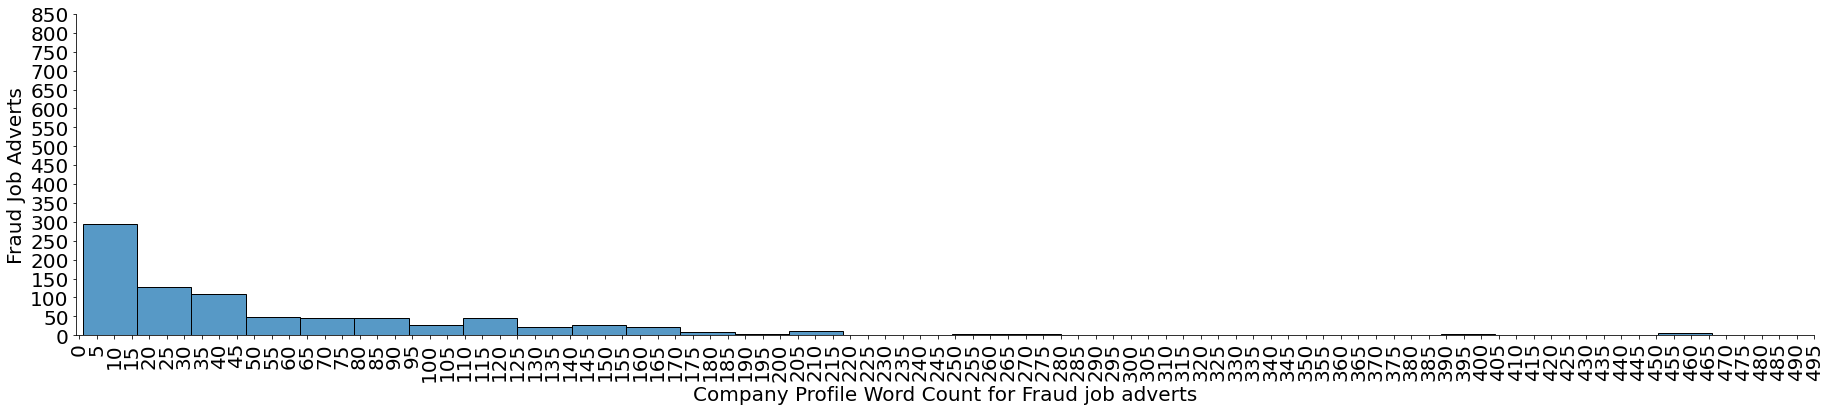

In [ ]:
sns.displot(list(req_len_fraud['req_len']), height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Company Profile Word Count for Fraud job adverts', fontsize = 20)
plt.ylabel('Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,500,5), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(req_len_fraud['req_len'])), 50), fontsize = 20)
plt.show()

Considering 60 as threshold for requirements word count, as fraud jobs have total 575 out of 866 fraud job adverts (66%) and genuine jobs have 8292 adverts out of 17014 (48%) below 60 word count length.

In [ ]:
len(jobdf[(jobdf['req_len']<=60) & (jobdf['fraudulent']==0)])

8292

In [ ]:
len(jobdf[jobdf['fraudulent']==0])

17014

In [ ]:
#has short description
def has_short_req(x):
  if x <= 60:
    return 1
  else:
    return 0

#has_short_desc = lambda x: 1 if x<=100 else 0

short_req_list = jobdf['req_len'].apply(has_short_req)

In [ ]:
jobdf['has_short_req'] = short_req_list
print(short_req_list[0:5], "\n", jobdf.req_len.head(5))

0    0
1    0
2    0
3    0
4    0
Name: req_len, dtype: int64 
 0    115
1    187
2    164
3    174
4     89
Name: req_len, dtype: int64


In [ ]:
print(len(jobdf[(jobdf['req_len']<=10) & (jobdf['fraudulent']==1)]))
print(average(jobdf[(jobdf['req_len']<=100) & (jobdf['fraudulent']==1)].req_len))

245
28.84179970972424


Replacing NaN values to Empty

In [ ]:
jobdf['employment_type'].fillna('Empty',inplace=True)
jobdf['required_experience'].fillna('Empty',inplace=True)
jobdf['required_education'].fillna('Empty',inplace=True)
jobdf['industry'].fillna('Empty',inplace=True)
jobdf['function'].fillna('Empty',inplace=True)
jobdf['department'].fillna('Empty',inplace=True)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,compprof_len,desc_len,req_len,benefits_len,empty_compprof,empty_desc,empty_req,empty_benefits,has_short_desc,has_short_benefits,has_short_compprof,has_short_req
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,empty,0,1,0,Other,Internship,Empty,Empty,Marketing,0,141,124,115,1,0,0,0,1,0,1,0,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Empty,Marketing and Advertising,Customer Service,0,150,309,187,225,0,0,0,0,0,0,0,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Empty,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,empty,0,1,0,Empty,Empty,Empty,Empty,Empty,0,136,50,164,1,0,0,0,1,1,1,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,85,345,174,96,0,0,0,0,0,0,0,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Empty,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,205,182,89,3,0,0,0,0,0,0,0,0


In [ ]:
jobdf.head()

,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,empty_compprof,empty_desc,empty_req,empty_benefits,has_short_desc,fraudulent
0,Marketing,0,1,0,Other,Internship,Empty,Empty,Marketing,0,0,0,0,0,0
1,Success,0,1,0,Full-time,Not Applicable,Empty,Marketing and Advertising,Customer Service,0,0,0,0,0,0
2,Empty,0,1,0,Empty,Empty,Empty,Empty,Empty,0,0,0,0,1,0
3,Sales,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0,0,0,0,0
4,Empty,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0,0,0,0,0


#Create new feature has_special_attributes

In [ ]:
special_attr_list = []

for i in range(len(jobdf['required_education'])):
  a = jobdf['required_education'][i]
  b = jobdf['required_experience'][i]
  c = jobdf['function'][i]
  d = jobdf['department'][i]

  if a == 'Empty' and b == 'Empty' and c == 'Empty' and d == 'Empty':
    special_attr_list.append(1)
  else:
    special_attr_list.append(0)
  


In [ ]:
special_attr_list[0:5]

[0, 0, 1, 0, 0]

In [ ]:
jobdf['has_spec_attr'] = special_attr_list

In [ ]:
jobdf.head()

Trying Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

#Machine Learning Starts Here

In [ ]:
detectdf = jobdf.copy()

In [ ]:
detectdf.drop(['title','location','salary_range','company_profile','description','requirements','benefits','compprof_len','desc_len','benefits_len','req_len'],axis=1,inplace=True)

In [ ]:
detectdf.drop(['job_id'],axis=1,inplace=True)

In [ ]:
detectdf = detectdf[['department','telecommuting','has_company_logo','has_questions','employment_type','required_experience','required_education','industry','function','empty_compprof','empty_desc','empty_req','empty_benefits','has_short_desc','has_short_compprof', 'has_spec_attr','fraudulent']]

In [ ]:
#detectdf = detectdf[['department','telecommuting','has_company_logo','has_questions','employment_type','required_experience','required_education','industry','function','empty_compprof','empty_desc','empty_req','empty_benefits','has_short_desc','fraudulent']]

In [ ]:
detectdf.head()

,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,empty_compprof,empty_desc,empty_req,empty_benefits,has_short_desc,has_short_compprof,has_spec_attr,fraudulent
0,Marketing,0,1,0,Other,Internship,Empty,Empty,Marketing,0,0,0,0,0,0,0,0
1,Success,0,1,0,Full-time,Not Applicable,Empty,Marketing and Advertising,Customer Service,0,0,0,0,0,0,0,0
2,Empty,0,1,0,Empty,Empty,Empty,Empty,Empty,0,0,0,0,1,0,1,0
3,Sales,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0,0,0,0,0,0,0
4,Empty,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0,0,0,0,0,0,0


#One Hot Encoding

In [ ]:
detectdf = pd.get_dummies(detectdf, columns = ['department', 'employment_type','required_education','required_experience','industry','function'])
detectdf.head()

,telecommuting,has_company_logo,has_questions,empty_compprof,empty_desc,empty_req,empty_benefits,has_short_desc,has_short_compprof,has_spec_attr,fraudulent,department_,department_ \tCorporate Shared Services,department_ Lower Level Management,department_ Marketing,department_ Moni Technologies,department_ R&D,department_(Consultant),department_.NET,department_.net Development,department_0,department_1221,department_130 - Nutritional Yeast Packaging,department_1411,department_20,department_20131101,department_30517,department_3D Art,department_4,department_49,department_5,"department_6 locations in the United States, 3 in Canada and 1 in UK",department_640 Labs,department_@ ecgstudio | process improvement specialists,department_A Techstars Company,department_ACCOUNTING,department_ACCT,department_ACES,department_ACT,department_ADMIN,department_ADS,department_AFS12,department_AFS13,department_AFS14,department_AFS16,department_AFS18,department_AFSAU,department_AFSCC,department_AFSDT,department_AFSDTV,department_AFSHAR,department_AFSHO,department_AFSHON,department_AFSHOT,department_AFSMCA,department_AFSSA,department_AGENCY CONFIDENTIAL,department_ALM Practice,department_AMG,department_AMHS,department_AML,department_ANDROIDPIT,department_APP MEDIA,department_AR,department_AX 20140308/09 (2),department_Aberdeen,department_Academic,department_Account,department_Account Handling,department_Account Management,department_Account team,department_Account/finance,department_Accountant,department_Accounting,department_Accounting & Finance,department_Accounting / Finance,department_Accounting and Finance,department_Accounting/Finance,department_Accounting/Payroll,department_Accounts,department_Acquisitions and Divesments,department_Ad Sales,department_AdOps,department_AdYapper,department_Addy,department_Admin,department_Admin - Clerical,department_Admin/Clerical,department_Administration,department_Administration,department_Administration support,department_Administrative,department_Administrative,department_Administrative Dept,department_Administrative Office,department_Administrator,department_Advertising,department_Advisory,department_Advisory Department,department_Aerospace and Defense Engineering Services,department_Affiliate Marketing,department_Africa Program,department_African Program,department_Agency Systems,department_Agriculture,department_Aker Solutions Inc.,department_All,department_All Companies,department_An Impact Engine Company,department_Analyst,department_Analytics,department_Analytics & UX,department_Ancillery Revenue,department_Android,department_Android,department_Android Developer,department_Animal Control,department_Animation,department_Anti-Virus Software,department_App,department_App Delivery,department_App Dev,department_App Development,department_Appear Here,department_Application Development,department_Approvals Department,department_Apps,department_Aptris,department_Arc Int.,department_Architect,department_Argo Platinum,department_Art,department_Art Fairs,department_Art Studio,department_Art and Design,department_Asset Management,department_Assistant,department_Athletics,department_Audiology,department_Auto Sales,department_Automotive,department_Automotive and Parts Mfg,department_B2B,department_BCFB,department_BD,department_BDC,department_BDVPS,department_BI,department_BI Department – Applications Directorate,department_BIOMEDICAL EQUIPMENT TECHNICAN,department_BIPIO,department_BORN SOCIAL,department_Back Office,department_Back-End Development,department_Backend,department_Backend Developer,department_Bandsintown Amplified Textlinks,department_Banking,department_Berlin,department_Big Data,department_BigTime Software,department_Billing,department_Bindery,department_Biotech,department_Birdback,department_Biz Dev,department_BizDev/Product,department_Blippbuilder,department_Board of Directors,department_Branch Services,department_Brand,department_Brand and Marketing,department_Brandid,department_Broadcasting,depart

In [ ]:
detectdf.head()

#LabelEncoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

jobdf['department'] = labelencoder.fit_transform(jobdf['department'])
jobdf['employment_type'] = labelencoder.fit_transform(jobdf['employment_type'])
jobdf['required_education'] = labelencoder.fit_transform(jobdf['required_education'])
jobdf['required_experience'] = labelencoder.fit_transform(jobdf['required_experience'])
jobdf['industry'] = labelencoder.fit_transform(jobdf['industry'])
jobdf['function'] = labelencoder.fit_transform(jobdf['function'])



In [ ]:
jobdf.head()

,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,empty_compprof,empty_desc,empty_req,empty_benefits,has_short_desc,fraudulent
0,Marketing,0,1,0,Other,Internship,Empty,Empty,Marketing,0,0,0,0,0,0
1,Success,0,1,0,Full-time,Not Applicable,Empty,Marketing and Advertising,Customer Service,0,0,0,0,0,0
2,Empty,0,1,0,Empty,Empty,Empty,Empty,Empty,0,0,0,0,1,0
3,Sales,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0,0,0,0,0
4,Empty,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree



In [ ]:
jdf = detectdf.drop(['fraudulent'],axis=1)
y = detectdf['fraudulent']

In [ ]:
print(jdf.shape)
print(y.shape)

(17880, 1546)
(17880,)


Random Undersampling

In [ ]:
rus  = RandomUnderSampler(random_state=42)
jdf,y = rus.fit_resample(jdf, y)

jdf = pd.DataFrame(jdf)
y = pd.DataFrame(y)

In [ ]:
print(jdf.shape)
print(y.shape)

(1732, 1546)
(1732, 1)


In [ ]:
print(jobdf[jobdf['fraudulent']==1].shape)

(866, 29)


#Splitting the data train test

In [ ]:
# Splitting the data - 80:20 ratio
##X_train, X_test, y_train, y_test = train_test_split(jdf, y,test_size = 0.2, random_state = 50)
##print("Training split input- ", X_train.shape)
##print("Testing split input- ", X_test.shape)

Training split input-  (14304, 1546)
Testing split input-  (3576, 1546)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(jdf, y,test_size = 0.2, random_state = 50)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (1385, 1546)
Testing split input-  (347, 1546)


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(solver='lbfgs', max_iter=400).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
predicted = log_model.predict(X_test)
p = pd.DataFrame(predicted)
actual = y_test

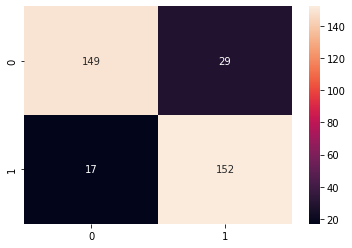

In [ ]:
import sklearn.metrics as sm
cf_matrix = sm.confusion_matrix(actual,p)
sns.heatmap(cf_matrix, annot = True, fmt='g')

In [ ]:
print("Classification report - \n", classification_report(y_test,predicted))

Classification report - 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       178
           1       0.84      0.90      0.87       169

    accuracy                           0.87       347
   macro avg       0.87      0.87      0.87       347
weighted avg       0.87      0.87      0.87       347



#DECISION TREE

In [ ]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [ ]:
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       178
           1       0.86      0.89      0.87       169

    accuracy                           0.87       347
   macro avg       0.87      0.87      0.87       347
weighted avg       0.87      0.87      0.87       347



#RANDOM FOREST

In [ ]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """



ACCURACY OF THE MODEL:  0.9250720461095101


In [ ]:
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       178
           1       0.92      0.92      0.92       169

    accuracy                           0.93       347
   macro avg       0.93      0.93      0.93       347
weighted avg       0.93      0.93      0.93       347



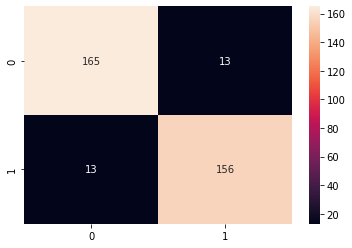

In [ ]:
import sklearn.metrics as sm
p = pd.DataFrame(y_pred)
cf_matrix = sm.confusion_matrix(actual,p)
sns.heatmap(cf_matrix, annot = True, fmt='g')



GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
param_grid = { 
    "min_samples_leaf": [1, 3, 5, 10], 
    "min_samples_split" : [2, 4, 6, 10], 
    "n_estimators": [100, 400]
    }
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto',oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
clf.best_estimator_
print(clf.best_params_)
clf.best_score_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


0.9773490612847482

After HPT

In [ ]:
# Random Forest


# from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion = "gini", min_samples_leaf = 1, min_samples_split = 2,
n_estimators=400, max_features='auto', oob_score=True, random_state=1, n_jobs=-1) 
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

print("Classification report - \n", classification_report(y_test,y_pred))


ACCURACY OF THE MODEL:  0.9779082774049217
Classification report - 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3395
           1       0.87      0.66      0.75       181

    accuracy                           0.98      3576
   macro avg       0.93      0.83      0.87      3576
weighted avg       0.98      0.98      0.98      3576



In [ ]:
#from sklearn.model_selection import cross_val_predict
#predictions = cross_val_predict(random_forest, X_train, y_train,cv=3)

In [ ]:
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.8951048951048951
Recall: 0.5605839416058395


#SVM

In [ ]:
from sklearn.svm import SVC  
clf = SVC(kernel='rbf',C=1, gamma=10) 
  
# fitting x samples and y classes 
clf.fit(X_train, y_train) 

SVC(C=1, gamma=10)

In [ ]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3385
           1       0.95      0.62      0.75       191

    accuracy                           0.98      3576
   macro avg       0.97      0.81      0.87      3576
weighted avg       0.98      0.98      0.98      3576



#TODO END

In [ ]:
jobdf.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,compprof_len,desc_len,req_len,benefits_len,empty_compprof,empty_desc,empty_req,empty_benefits,has_short_desc,has_short_compprof
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Empty,0,1,0,Other,Internship,Empty,Empty,Marketing,0,141,124,115,1,0,0,0,0,0,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Empty,Marketing and Advertising,Customer Service,0,150,309,187,225,0,0,0,0,0,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Empty,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Empty,0,1,0,Empty,Empty,Empty,Empty,Empty,0,136,50,164,1,0,0,0,0,1,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,85,345,174,96,0,0,0,0,0,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Empty,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,205,182,89,3,0,0,0,0,0,0


Average of Length of Textual columns for Fraud and NonFraud job adverts

In [ ]:
from numpy.lib.function_base import average
print(average(compprof_fraud))
print(average(compprof_nonfraud))

print(average(desc_fraud))
print(average(desc_nonfraud))

print(average(benefits_fraud))
print(average(benefits_nonfraud))

print(average(req_len_fraud))
print(average(req_len_nonfraud)) 



32.953810623556585
94.94157752439168
157.81524249422634
171.0435523686376
30.648960739030024
30.400846361819678
58.043879907621246
79.34365816386506


In [ ]:
print("NonFraud job advert with maximum Description word count", desc_nonfraud.max())
print("NonFraud job advert with maximum Benefits word count", benefits_nonfraud.max())
print("NonFraud job advert with maximum Company Profile word count", compprof_nonfraud.max())

print("NonFraud job advert with minimum Description word count", desc_nonfraud.min())
print("NonFraud job advert with minimum Benefits word count", benefits_nonfraud.min())
print("NonFraud job advert with minimum Company Profile word count", compprof_nonfraud.min())

print("NonFraud job advert with average Description word count", desc_nonfraud.mean())
print("NonFraud job advert with average Benefits word count", benefits_nonfraud.mean())
print("NonFraud job advert with average Company Profile word count", compprof_nonfraud.mean())


print("Fraud job advert with maximum Description word count", desc_fraud.max())
print("Fraud job advert with maximum Benefits word count", benefits_fraud.max())
print("Fraud job advert with maximum Company Profile word count", compprof_fraud.max())

print("Fraud job advert with minimum Description word count", desc_fraud.min())
print("Fraud job advert with minimum Benefits word count", benefits_fraud.min())
print("Fraud job advert with minimum Company Profile word count", compprof_fraud.min())

print("Fraud job advert with average Description word count", desc_fraud.mean())
print("Fraud job advert with average Benefits word count", benefits_fraud.mean())
print("Fraud job advert with average Company Profile word count", compprof_fraud.mean())

NonFraud job advert with maximum Description word count desc_len    2074
dtype: int64
NonFraud job advert with maximum Benefits word count benefits_len    678
dtype: int64
NonFraud job advert with maximum Company Profile word count compprof_len    884
dtype: int64
NonFraud job advert with minimum Description word count desc_len    1
dtype: int64
NonFraud job advert with minimum Benefits word count benefits_len    1
dtype: int64
NonFraud job advert with minimum Company Profile word count compprof_len    1
dtype: int64
NonFraud job advert with average Description word count desc_len    171.043552
dtype: float64
NonFraud job advert with average Benefits word count benefits_len    30.400846
dtype: float64
NonFraud job advert with average Company Profile word count compprof_len    94.941578
dtype: float64
Fraud job advert with maximum Description word count desc_len    1183
dtype: int64
Fraud job advert with maximum Benefits word count benefits_len    412
dtype: int64
Fraud job advert with 

#Seaborn countplot showing most desired required education in job adverts.(Without considering NA values.

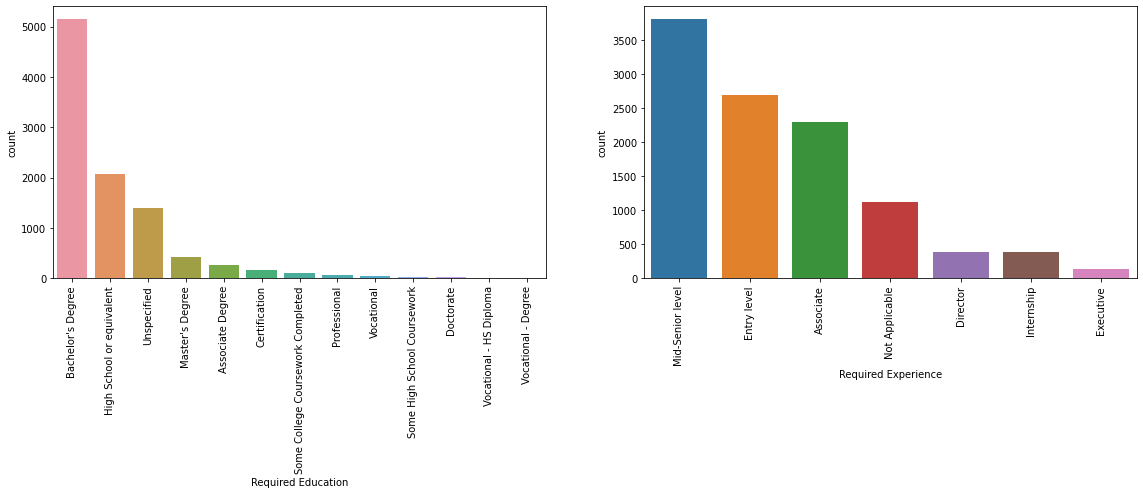

In [ ]:
plt.figure(figsize=(30,5))
fig1 = plt.subplot(1,3,1)
ax1 = sns.countplot(x=jobdf['required_education'].astype(str), data=jobdf['required_education'], order = jobdf['required_education'].value_counts().index)
plt.setp(ax1.get_xticklabels(), rotation=90)
plt.xlabel('Required Education')

# fig2 = plt.subplot(1,3,2)
# ax2 = sns.countplot(x=jfraud['required_education'].astype(str), data=jfraud, order = jfraud['required_education'].value_counts().index)
# plt.setp(ax2.get_xticklabels(), rotation=90)
# plt.xlabel('Required Education for Fraud Jobs')

fig2 = plt.subplot(1,3,2)
ax2 = sns.countplot(x=jobdf['required_experience'].astype(str),  data=jobdf['required_experience'], order = jobdf['required_experience'].value_counts().index)
plt.setp(ax2.get_xticklabels(), rotation = 90)
plt.xlabel('Required Experience')

plt.show()

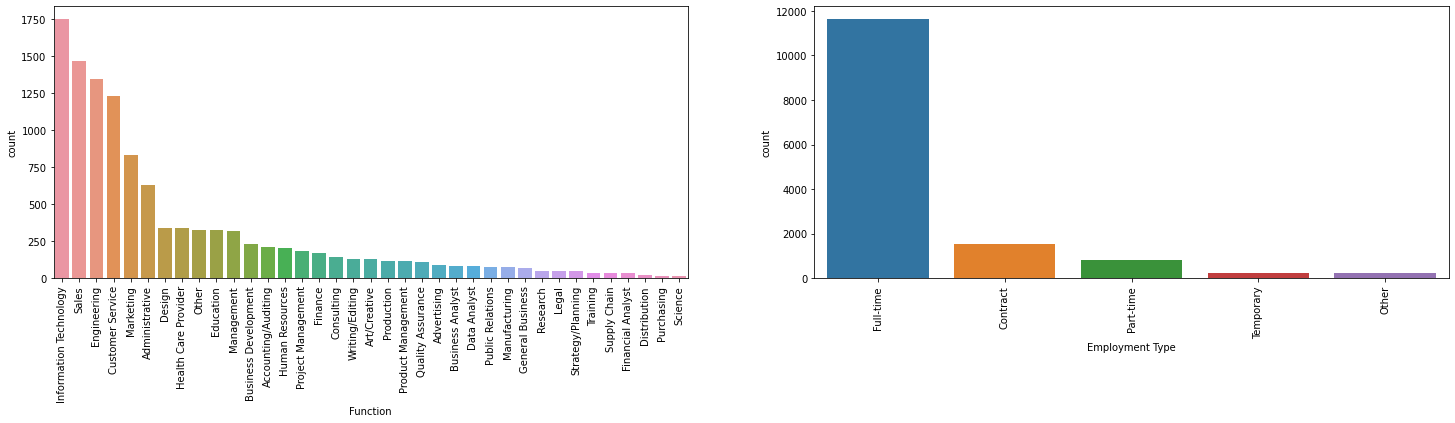

In [ ]:
frj = jobdf[jobdf['fraudulent']==0]
plt.figure(figsize=(25,5))
fig1 = plt.subplot(1,2,1)
ax=sns.countplot(x=jobdf['function'].astype(str), data=jobdf['function'], order = jobdf['function'].value_counts().index)
#plt.xticks(rotation='vertical')
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel('Function')

fig3 = plt.subplot(1,2,2)
ax3 = sns.countplot(x=jobdf['employment_type'].astype(str), data=jobdf['employment_type'], order = jobdf['employment_type'].value_counts().index)
plt.setp(ax3.get_xticklabels(), rotation = 90)
plt.xlabel('Employment Type')

plt.show()

#Plotting above graphs for NonFraud V Fraud.

Text(0.5, 0, 'Required Education for Fraud Jobs')

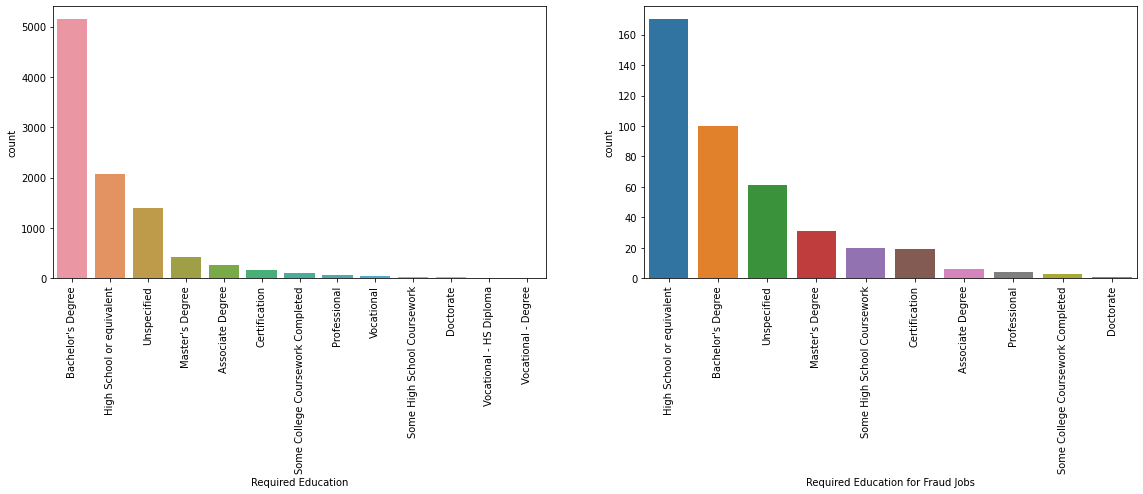

In [ ]:
jfraud = pd.DataFrame(jobdf[jobdf['fraudulent']==1])

plt.figure(figsize=(30,5))
fig1 = plt.subplot(1,3,1)
ax1 = sns.countplot(x=jobdf['required_education'].astype(str), data=jobdf['required_education'], order = jobdf['required_education'].value_counts().index)
plt.setp(ax1.get_xticklabels(), rotation=90)
plt.xlabel('Required Education')

fig2 = plt.subplot(1,3,2)
ax2 = sns.countplot(x=jfraud['required_education'].astype(str), data=jfraud, order = jfraud['required_education'].value_counts().index)
plt.setp(ax2.get_xticklabels(), rotation=90)
plt.xlabel('Required Education for Fraud Jobs')

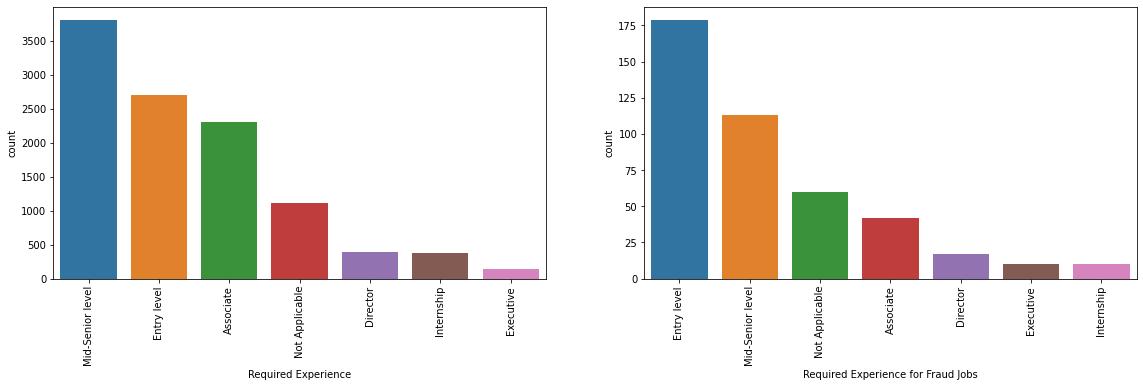

In [ ]:

plt.figure(figsize=(30,5))
fig1 = plt.subplot(1,3,1)
ax1 = sns.countplot(x=jobdf['required_experience'].astype(str),  data=jobdf['required_experience'], order = jobdf['required_experience'].value_counts().index)
plt.setp(ax1.get_xticklabels(), rotation = 90)
plt.xlabel('Required Experience')

fig2 = plt.subplot(1,3,2)
ax2 = sns.countplot(x=jfraud['required_experience'].astype(str),  data=jfraud['required_experience'], order = jfraud['required_experience'].value_counts().index)
plt.setp(ax2.get_xticklabels(), rotation = 90)
plt.xlabel('Required Experience for Fraud Jobs')

plt.show()


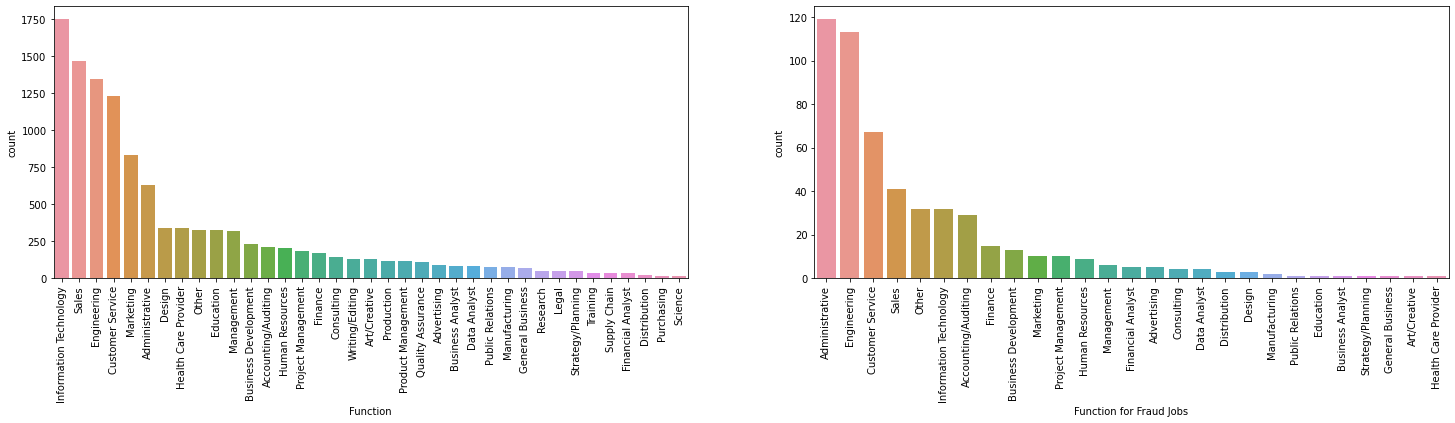

In [ ]:
plt.figure(figsize=(25,5))
fig1 = plt.subplot(1,2,1)
ax=sns.countplot(x=jobdf['function'].astype(str), data=jobdf['function'], order = jobdf['function'].value_counts().index)
#plt.xticks(rotation='vertical')
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel('Function')

fig1 = plt.subplot(1,2,2)
ax2=sns.countplot(x=jfraud['function'].astype(str), data=jfraud['function'], order = jfraud['function'].value_counts().index)
#plt.xticks(rotation='vertical')
plt.setp(ax2.get_xticklabels(), rotation=90)
plt.xlabel('Function for Fraud Jobs')




plt.show()

Text(0.5, 0, 'Employment Type')

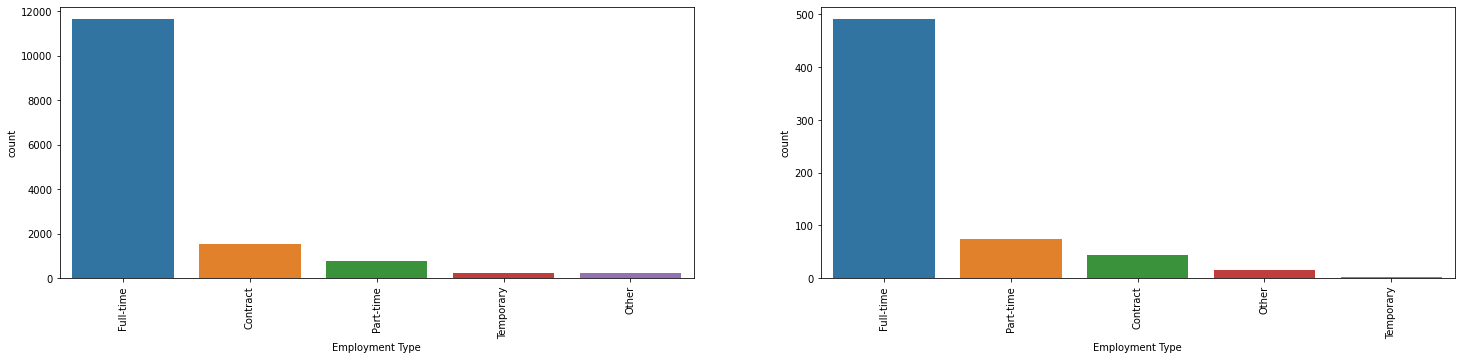

In [ ]:
plt.figure(figsize=(25,5))

fig = plt.subplot(1,2,1)
ax = sns.countplot(x=jobdf['employment_type'].astype(str), data=jobdf[jobdf['fraudulent']==1], order = jobdf['employment_type'].value_counts().index)
plt.setp(ax.get_xticklabels(), rotation = 90)
plt.xlabel('Employment Type')


fig3 = plt.subplot(1,2,2)
ax3 = sns.countplot(x=jfraud['employment_type'].astype(str), data=jfraud, order = jfraud['employment_type'].value_counts().index)
plt.setp(ax3.get_xticklabels(), rotation = 90)
plt.xlabel('Employment Type for Fraud Jobs')

#STILL WIP

Text(0.5, 0, 'Description Length Distribution')

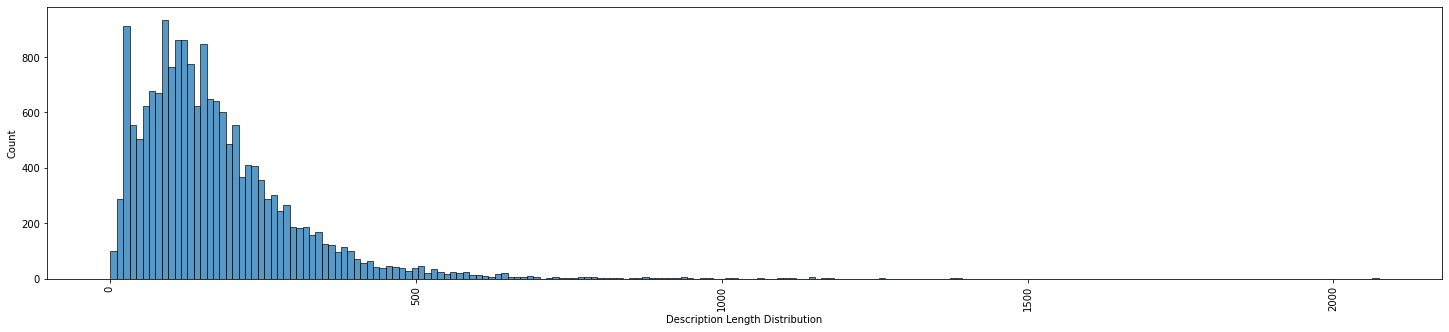

In [ ]:
plt.figure(figsize=(25,5))
figa = plt.subplot(1,1,1)
ax = sns.histplot(data = jobdf['desc_len'])
plt.setp(ax.get_xticklabels(), rotation = 90)
plt.xlabel('Description Length Distribution')

In [ ]:
plt.hist(x = jobdf.index, y = jobdf['desc_len'])

ValueError: ignored

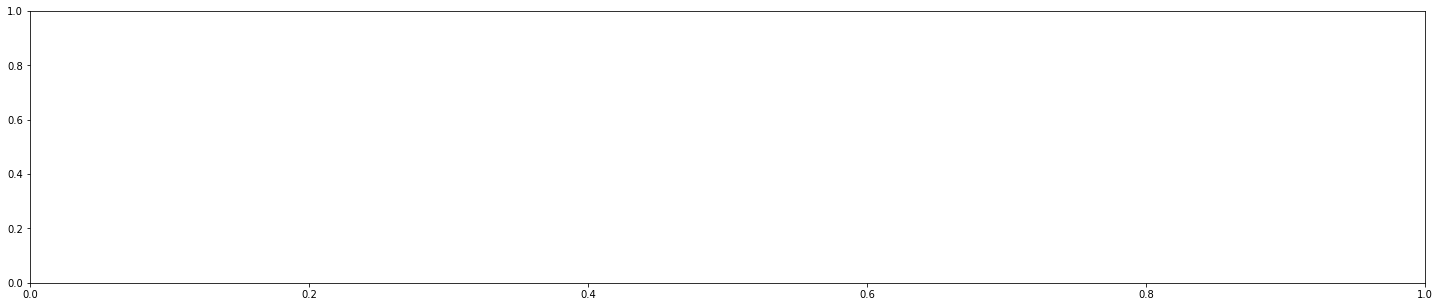

In [ ]:
plt.figure(figsize=(25,5))
figa = plt.subplot(1,1,1)
ax = plt.hist(x = jobdf.index, y = jobdf['desc_len'], data=jobdf)
plt.setp(ax.get_xticklabels(), rotation = 90)
plt.xlabel('Description Length Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


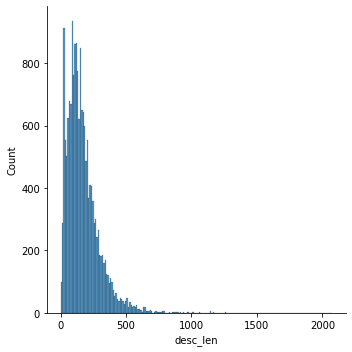

In [ ]:
from matplotlib import rcParams

#plt.figure(figsize=(15,5))
sns.displot(jobdf['desc_len'], ax=ax)


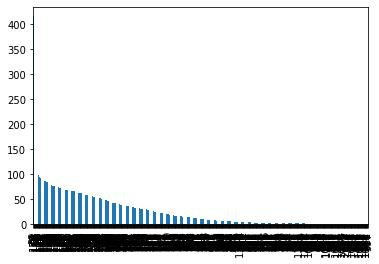

In [ ]:
fig, ax = plt.subplots()
jobdf['desc_len'].value_counts().plot(ax=ax, kind='bar')


In [ ]:
jobdf.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent,compprof_len,desc_len,req_len,benefits_len,empty_compprof,empty_desc,empty_req,empty_benefits
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434,91.939262,170.402852,78.312025,30.412864,0.185011,0.000056,0.150727,0.403244
std,5161.655742,0.202631,0.403492,0.499945,0.214688,84.607145,126.390467,84.489565,50.597575,0.388317,0.007479,0.357793,0.490563
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000,21.000000,86.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000,83.000000,145.000000,61.000000,6.000000,0.000000,0.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000,132.000000,223.000000,107.000000,41.000000,0.000000,0.000000,0.000000,1.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000,884.000000,2074.000000,1612.000000,678.000000,1.000000,1.000000,1.000000,1.000000


#This is wrong. Merged dataframe is only having 866 rows, 17k+ rows of nonfraud jobs desc is missing

In [ ]:
len_description_merged = pd.DataFrame(columns=['DescriptionFraud','DescriptionNonFraud'])
len_description_merged['DescriptionFraud'] = desc_fraud
len_description_merged['DescriptionNonFraud'] = desc_nonfraud
print(len_description_merged.head())
print(desc_fraud.shape)
print(desc_nonfraud.shape)
print(len_description_merged.shape)


   DescriptionFraud  DescriptionNonFraud
0               270                  124
1                59                  309
2               589                   50
3                 2                  345
4               270                  182
(866, 1)
(17014, 1)
(866, 2)


#Job Description word count plotted for fraud jobs and non-fraud jobs

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text major ticklabel objects>)

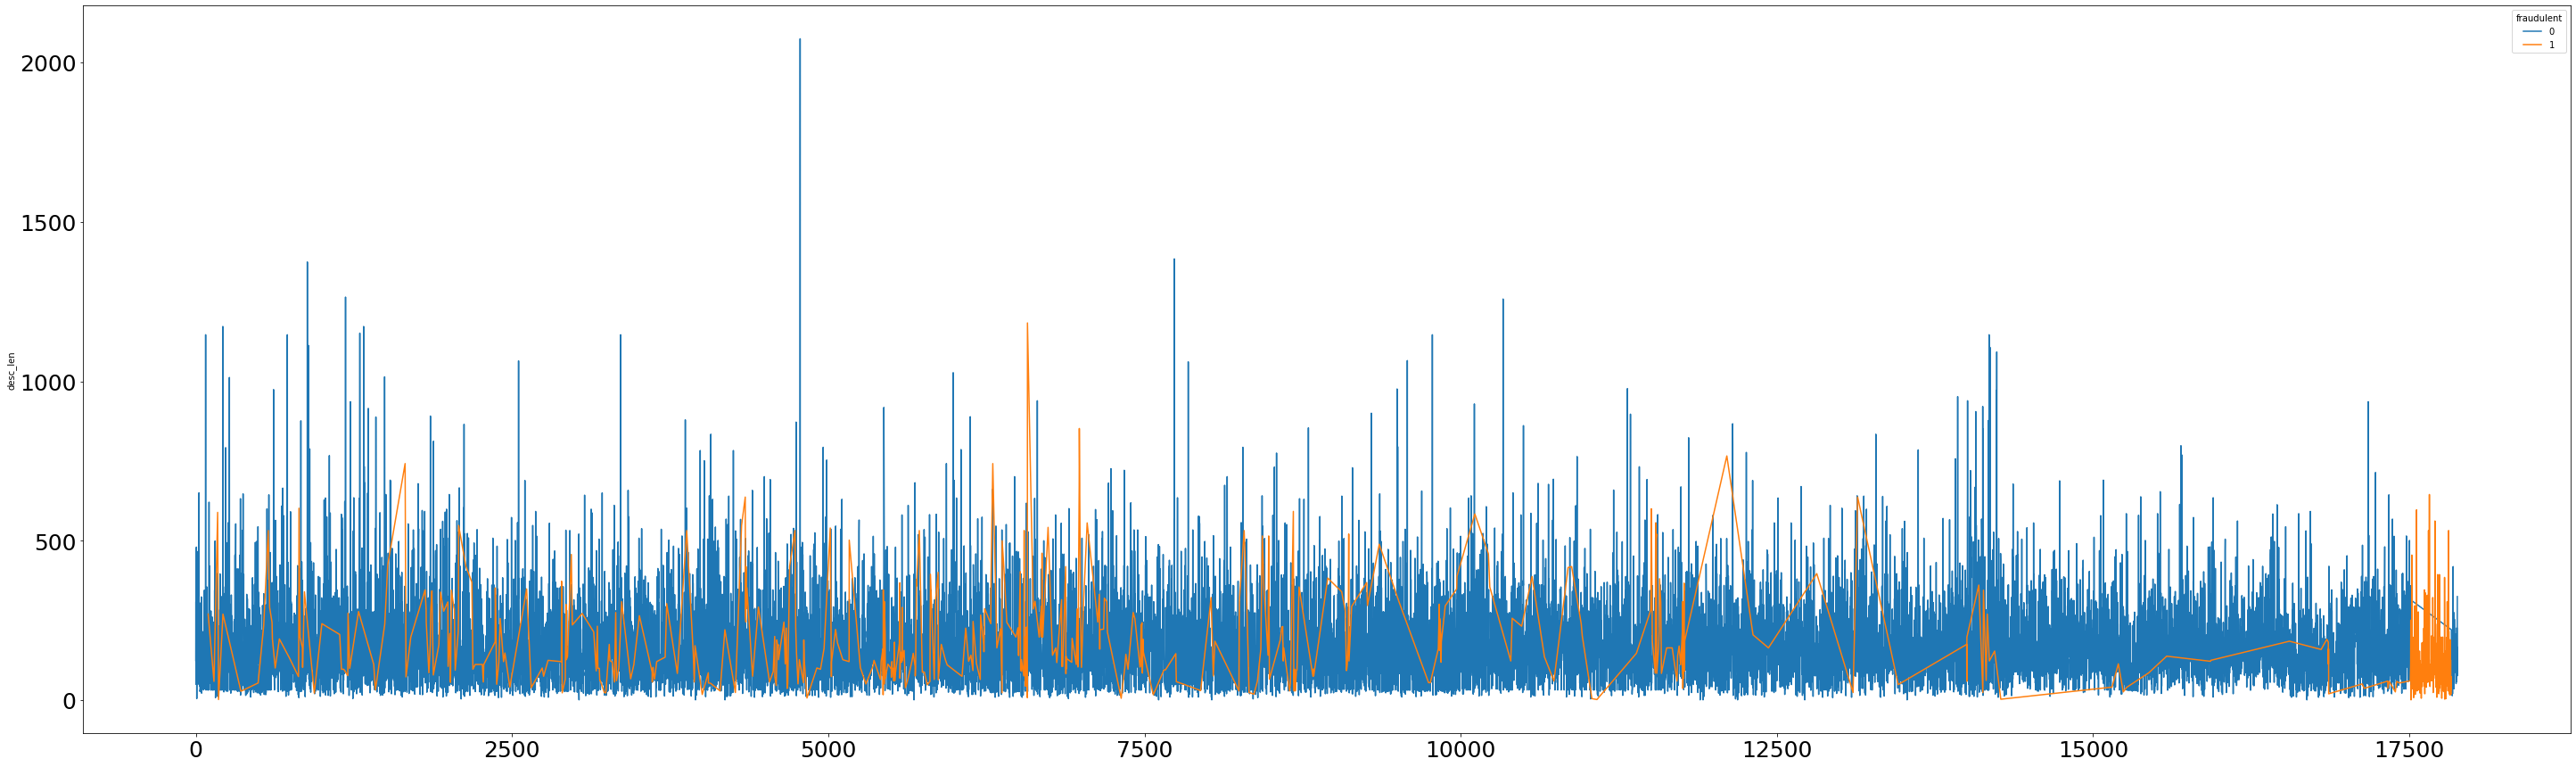

In [ ]:
from numpy.ma.core import size
plt.figure(figsize = (50,15))
sns.lineplot(x=jobdf.index, y=jobdf['desc_len'], hue=jobdf['fraudulent'], data = jobdf)
plt.xticks(size=25)
plt.yticks(size=25)

In [ ]:
print(desc_fraud['desc_len'].max())
print(desc_nonfraud['desc_len'].max())

1183
2074


6575    6576
Name: job_id, dtype: int64
1183


#KEEPING THIS UNEDITED